In [1]:
## Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.layers import Normalization

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Import Statsmodels
import scipy.stats as stats
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from pandas import read_csv, DataFrame
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from keras.optimizers import SGD
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split


2.14.0


In [2]:
RANDOM_STATE = 3000

In [3]:
## Слияние исходных данных
X_nup = pd.read_excel("C:\ds\X_nup.xlsx")
X_bp = pd.read_excel("C:\ds\X_bp.xlsx")
df=pd.merge(X_bp,X_nup, how='inner')
df.drop('Unnamed: 0', axis= 1 , inplace= True ) 
df.shape

(1023, 13)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head(10)

In [5]:

df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [11]:
# Фильтрация данных фильтром калмана
import numpy as np

def kalman_filter(data, initial_state_mean=0, initial_state_covariance=1, process_noise=0.1, measurement_noise=1):
    state_mean = initial_state_mean
    state_covariance = initial_state_covariance
    filtered_data = []

    for measurement in data:
        # предскажлательный шаг
        prediction_mean = state_mean
        prediction_covariance = state_covariance + process_noise

        # обновление
        kalman_gain = prediction_covariance / (prediction_covariance + measurement_noise)
        state_mean = prediction_mean + kalman_gain * (measurement - prediction_mean)
        state_covariance = (1 - kalman_gain) * prediction_covariance

        filtered_data.append(state_mean)

    return filtered_data

columns_to_filter = [
    'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа',
    'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
    'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
    'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
    'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'
]

# Применение фильтра Калмана к указанным столбцам
for column in columns_to_filter:
    initial_state_mean = df[column].values[0]
    filtered_data = kalman_filter(df[column].values, initial_state_mean=initial_state_mean)
    df[column] = filtered_data

df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.925002    0.233937   
Плотность, кг/м3                      1023.0  1976.029284   20.807906   
модуль упругости, ГПа                 1023.0   740.426144   88.638638   
Количество отвердителя, м.%           1023.0   110.113685    9.167850   
Содержание эпоксидных групп,%_2       1023.0    22.251048    0.676542   
Температура вспышки, С_2              1023.0   284.951747   15.135250   
Поверхностная плотность, г/м2         1023.0   481.455162   80.361618   
Модуль упругости при растяжении, ГПа  1023.0    73.316419    0.958613   
Прочность при растяжении, МПа         1023.0  2470.755740  134.593681   
Потребление смолы, г/м2               1023.0   218.534519   16.629834   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.885789    0.695498   
Плотность нашивки                     1023.0    57.114050    3.123939   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          1.857143     2.785778     2.917637   
Плотность, кг/м3                      1915.067099  1961.231347  1976.369676   
модуль упругости, ГПа                  507.552248   677.726679   737.234477   
Количество отвердителя, м.%             30.000000   105.580648   110.653044   
Содержание эпоксидных групп,%_2         20.521980    21.790269    22.219439   
Температура вспышки, С_2               100.000000   277.762552   285.836360   
Поверхностная плотность, г/м2          210.000000   430.698289   480.760007   
Модуль упругости при растяжении, ГПа    70.000000    72.658656    73.372630   
Прочность при растяжении, МПа         2103.556058  2372.783944  2469.099430   
Потребление смолы, г/м2                169.636077   206.322313   218.130116   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     6.476190     6.911864   
Плотность нашивки                       45.010728    55.104290    57.372078   

                                              75%          max  
Соотношение матрица-наполнитель          3.075893     3.563784  
Плотность, кг/м3                      1989.536764  2034.914643  
модуль упругости, ГПа                  800.741236  1078.716914  
Количество отвердителя, м.%            115.707504   128.244297  
Содержание эпоксидных групп,%_2         22.644258    24.588519  
Температура вспышки, С_2               292.783733   321.264192  
Поверхностная плотность, г/м2          538.357172   687.863404  
Модуль упругости при растяжении, ГПа    74.013333    75.583048  
Прочность при растяжении, МПа         2555.216443  3000.000000  
Потребление смолы, г/м2                230.318943   257.206002  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              7.326465     8.768710  
Плотность нашивки                       59.246674    65.782274

In [12]:
from scipy.signal import medfilt

columns_to_filter = [
    'Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа',
    'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
    'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
    'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
    'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'
]

for column in columns_to_filter:
    df[column] = medfilt(df[column], kernel_size=3)  # kernel_size=3 размер ядра (окна) для медианного фильтра
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.925079    0.231656   
Плотность, кг/м3                      1023.0  1976.031790   20.641883   
модуль упругости, ГПа                 1023.0   740.487319   87.664301   
Количество отвердителя, м.%           1023.0   110.128929    9.113668   
Содержание эпоксидных групп,%_2       1023.0    22.250829    0.669969   
Температура вспышки, С_2              1023.0   284.954342   15.056054   
Поверхностная плотность, г/м2         1023.0   481.429707   79.731006   
Модуль упругости при растяжении, ГПа  1023.0    73.316299    0.953378   
Прочность при растяжении, МПа         1023.0  2470.724597  133.469877   
Потребление смолы, г/м2               1023.0   218.522323   16.472395   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.885627    0.688419   
Плотность нашивки                     1023.0    57.117400    3.088990   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          1.857143     2.786194     2.917217   
Плотность, кг/м3                      1915.730538  1961.248202  1976.596851   
модуль упругости, ГПа                  512.300769   679.282435   736.971162   
Количество отвердителя, м.%             30.000000   105.605022   110.715337   
Содержание эпоксидных групп,%_2         20.562701    21.798977    22.219439   
Температура вспышки, С_2               100.000000   277.769424   285.937802   
Поверхностная плотность, г/м2          210.000000   430.896370   480.681307   
Модуль упругости при растяжении, ГПа    70.000000    72.662669    73.372630   
Прочность при растяжении, МПа         2107.062231  2375.576141  2471.756760   
Потребление смолы, г/м2                170.365963   206.458787   218.130116   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     6.478305     6.912483   
Плотность нашивки                       45.234922    55.104290    57.370752   

                                              75%          max  
Соотношение матрица-наполнитель          3.074718     3.555675  
Плотность, кг/м3                      1989.398771  2032.848359  
модуль упругости, ГПа                  799.781368  1068.524569  
Количество отвердителя, м.%            115.714253   127.859051  
Содержание эпоксидных групп,%_2         22.640956    24.493499  
Температура вспышки, С_2               292.726004   319.156969  
Поверхностная плотность, г/м2          537.575352   677.173335  
Модуль упругости при растяжении, ГПа    73.994907    75.518638  
Прочность при растяжении, МПа         2554.717679  3000.000000  
Потребление смолы, г/м2                230.117764   255.496370  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              7.320709     8.726775  
Плотность нашивки                       59.228941    65.513004

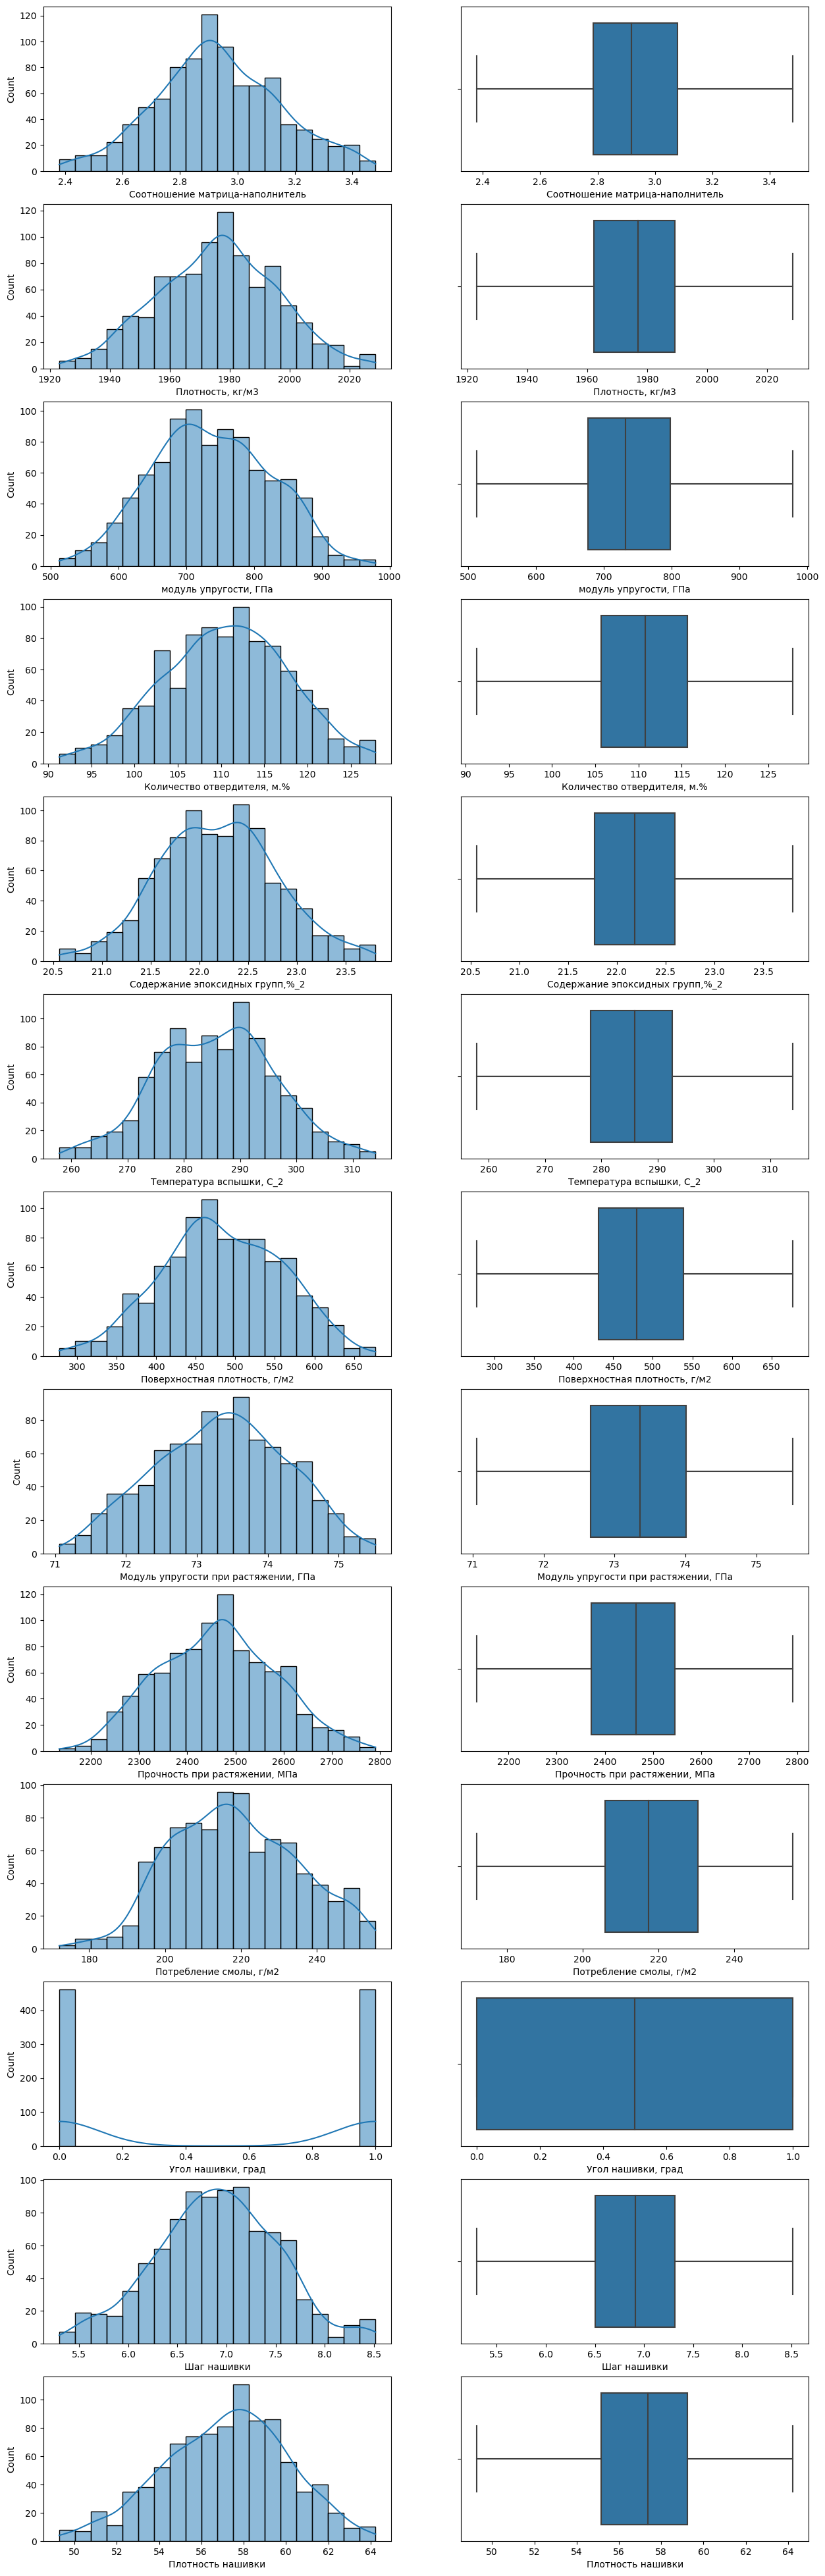

In [271]:
## Построение гистограммы и boxplot
fig, axes = plt.subplots(13, 2, figsize=(15, 50))
   
for i, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i, 0])
    sns.boxplot(data=df, x=column, ax=axes[i, 1])
    
plt.show()

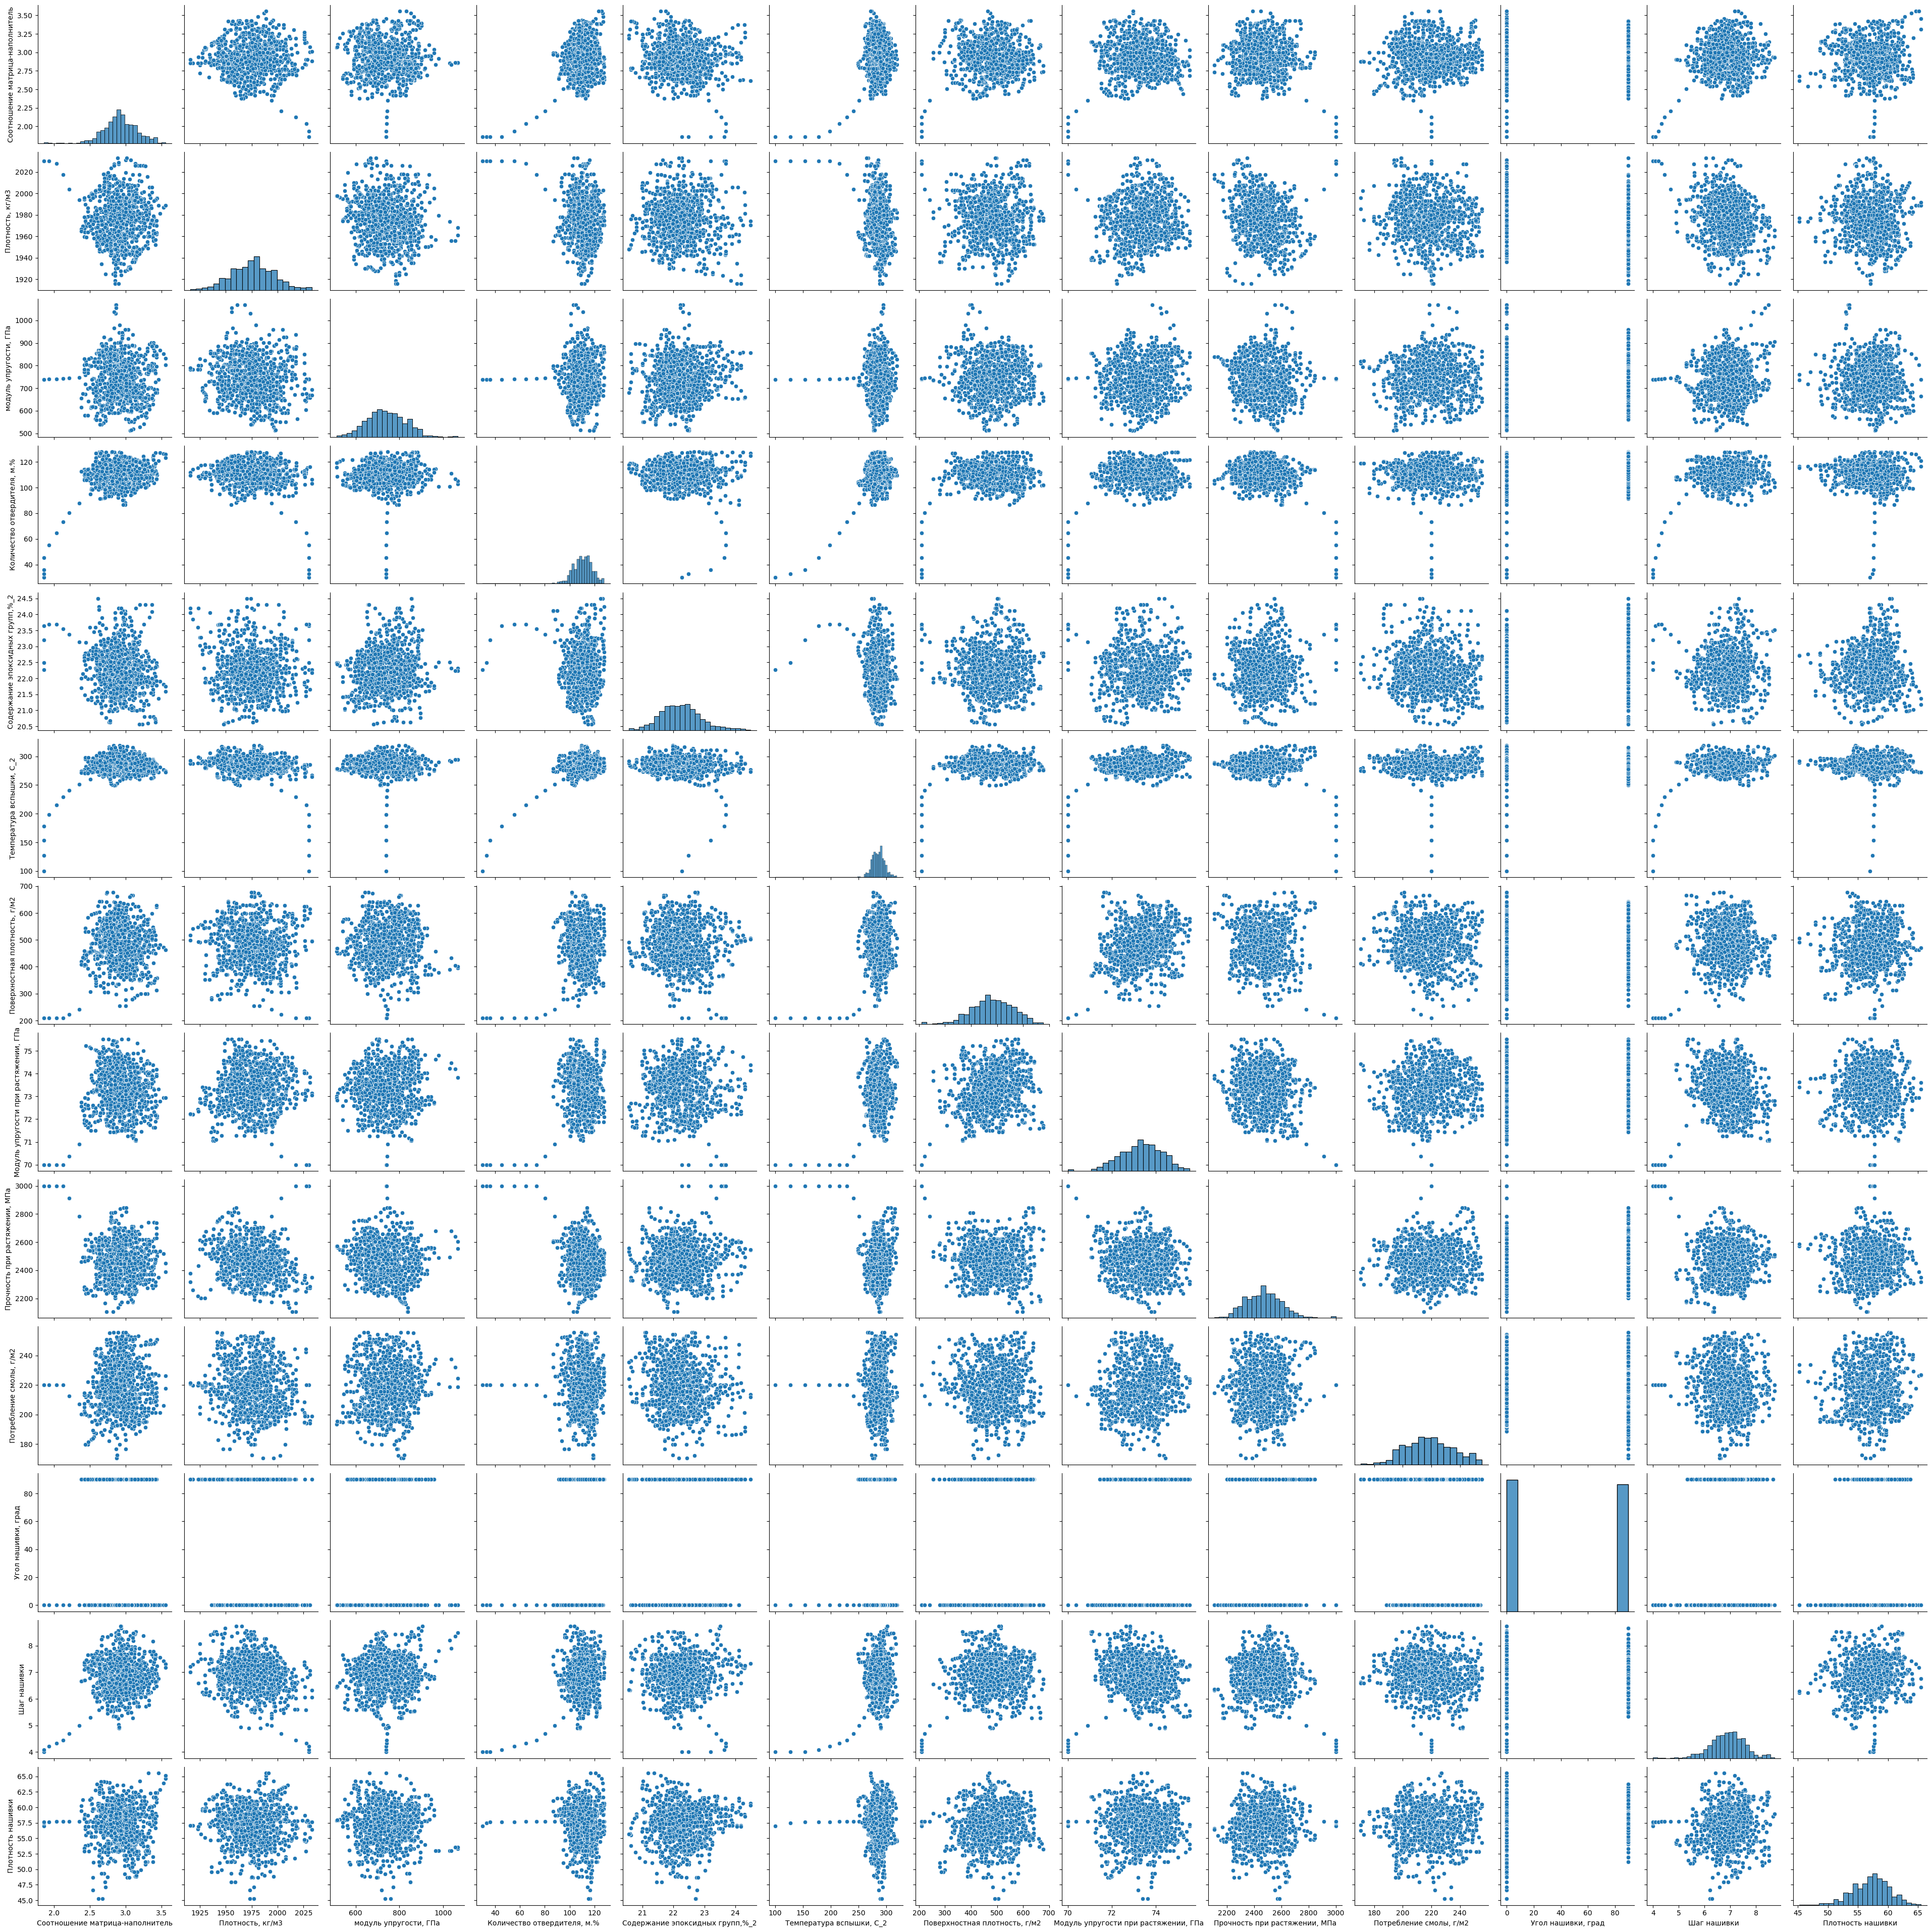

In [15]:
## Построение попарных графиков рассеяния
sns.pairplot(df, height=3);

Соотношение матрица-наполнитель: 3s=8 iq=12


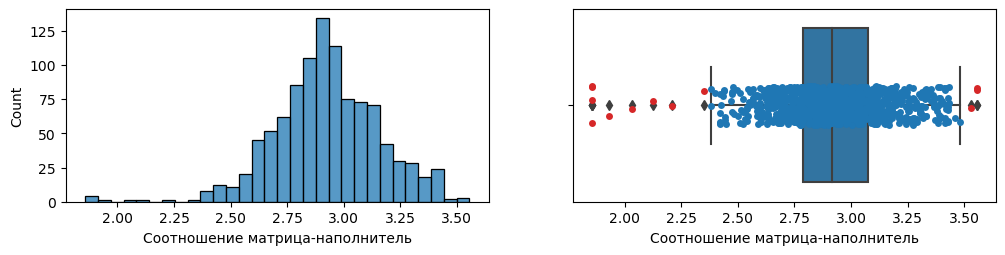

Плотность, кг/м3: 3s=0 iq=5


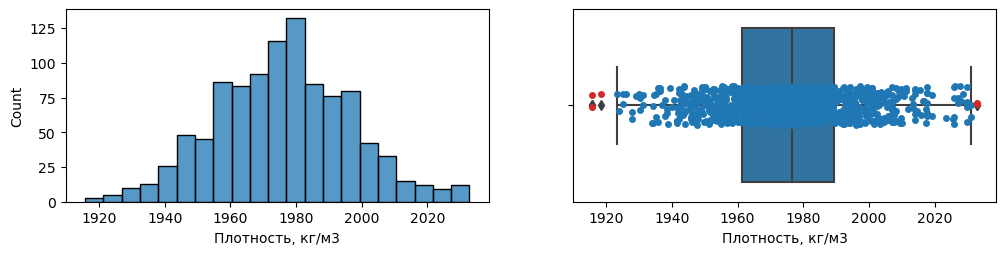

модуль упругости, ГПа: 3s=5 iq=5


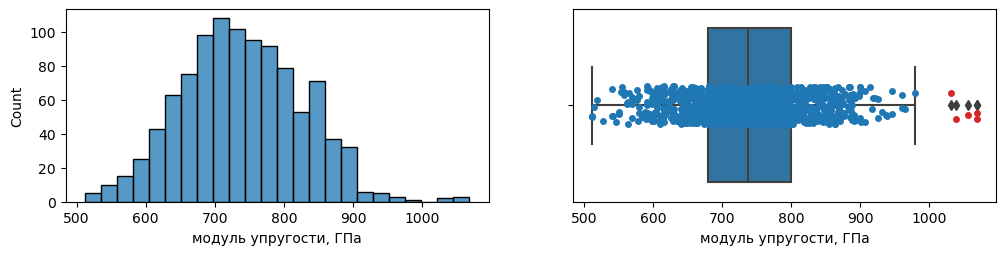

Количество отвердителя, м.%: 3s=8 iq=14


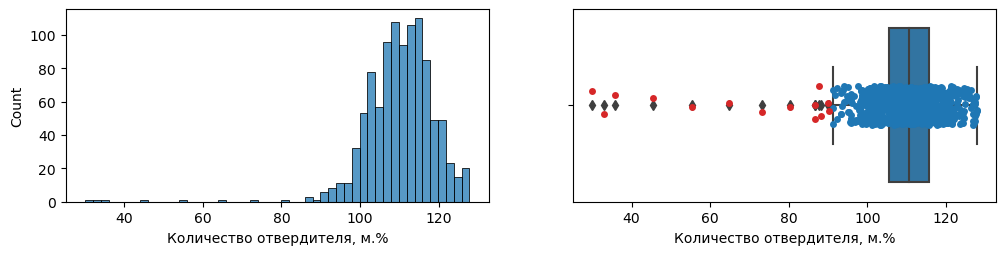

Содержание эпоксидных групп,%_2: 3s=5 iq=20


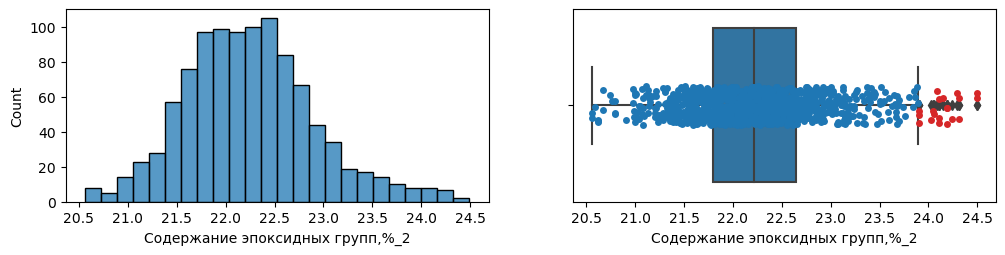

Температура вспышки, С_2: 3s=7 iq=23


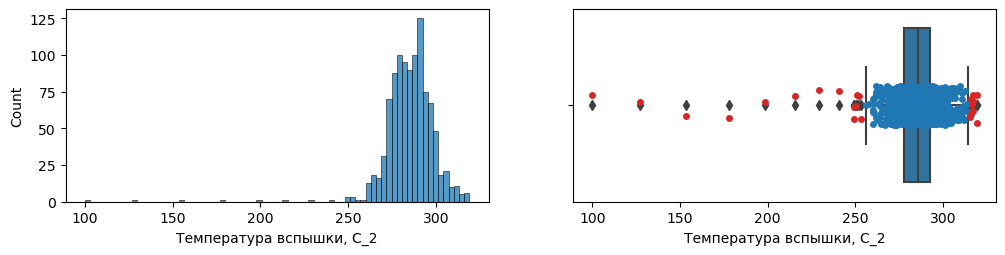

Поверхностная плотность, г/м2: 3s=9 iq=11


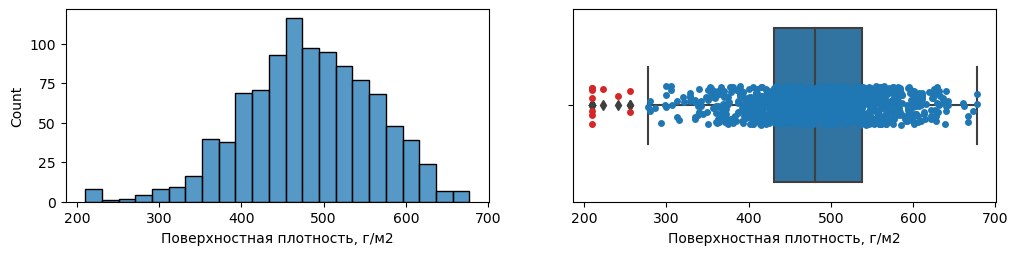

Модуль упругости при растяжении, ГПа: 3s=8 iq=8


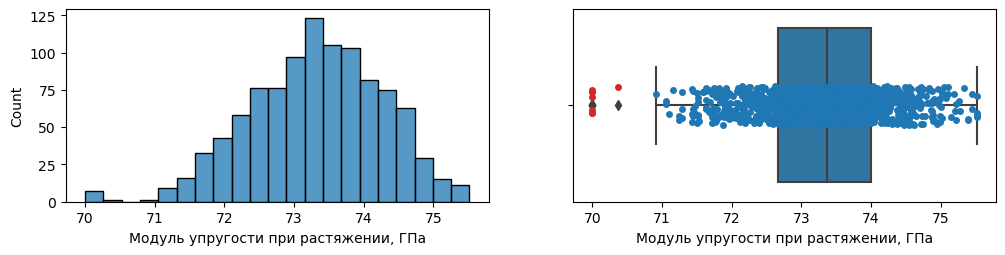

Прочность при растяжении, МПа: 3s=8 iq=11


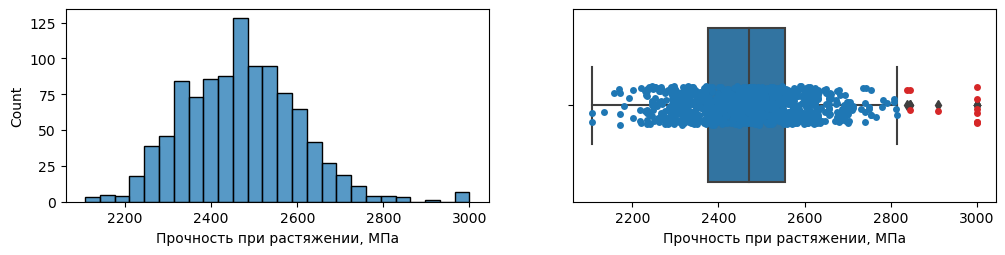

Потребление смолы, г/м2: 3s=0 iq=2


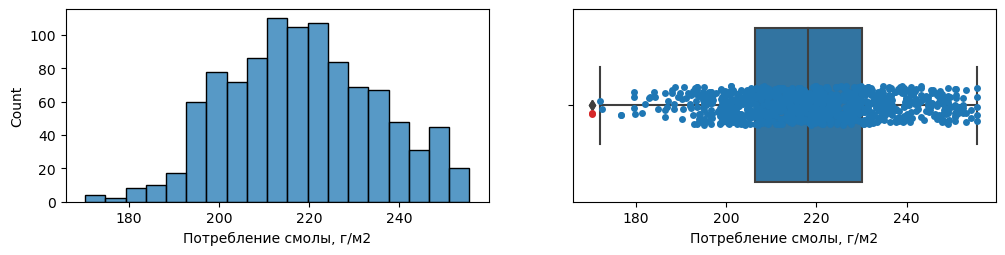

Угол нашивки, град: 3s=0 iq=0


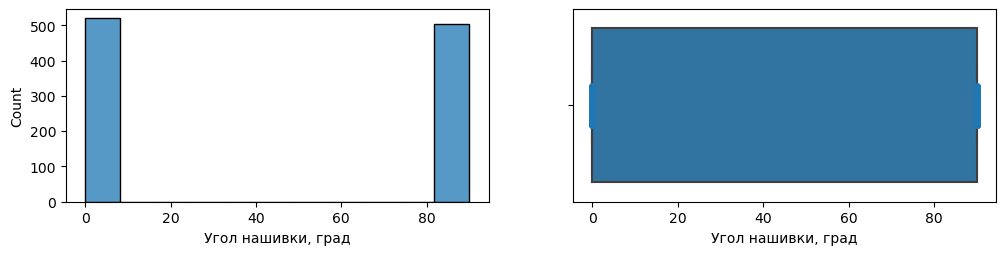

Шаг нашивки: 3s=8 iq=16


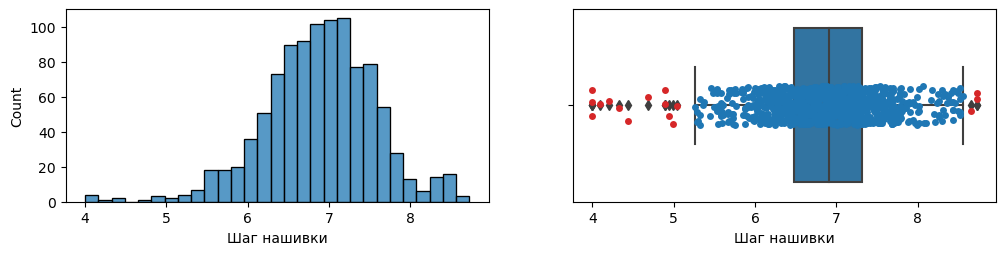

Плотность нашивки: 3s=4 iq=14


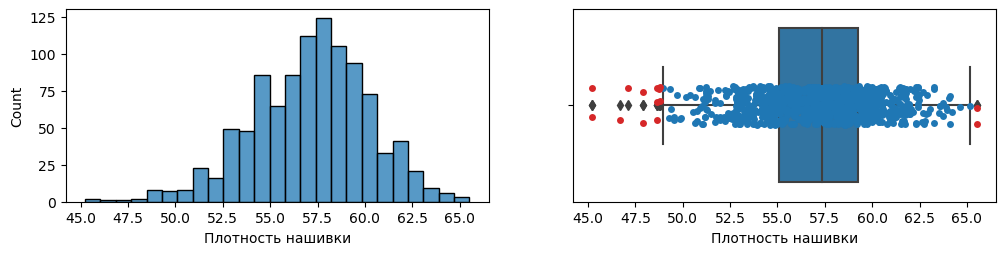

Метод 3-х сигм, выбросов: 70
Метод межквартильных расстояний, выбросов: 141


In [16]:
## Удаление выбросов
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column,  multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column,  ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [17]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
#     # визуализация выбросов
#     print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
#     fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
#     sns.histplot(data=d, x=column, color='purple', multiple='stack', legend=False, ax=axes[0])
#     sns.boxplot(data=d, x=column, color='tab:purple', ax=axes[1])
#     sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
#     sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
#     plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 14


In [19]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
#     # визуализация выбросов
#     print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
#     fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
#     sns.histplot(data=d, x=column, color='purple', multiple='stack', legend=False, ax=axes[0])
#     sns.boxplot(data=d, x=column, color='tab:purple', ax=axes[1])
#     sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
#     sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
#     plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 2


Соотношение матрица-наполнитель: 3s=0 iq=0


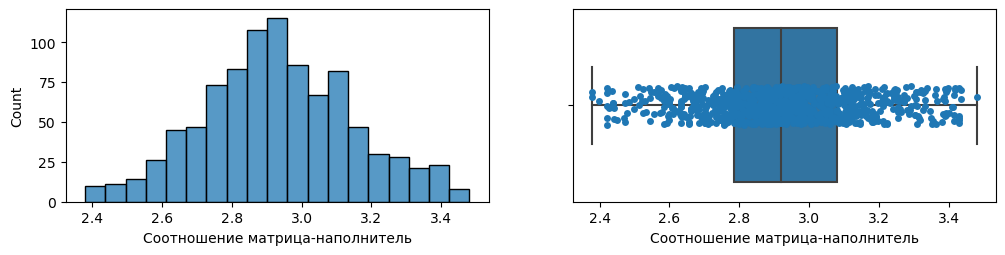

Плотность, кг/м3: 3s=0 iq=0


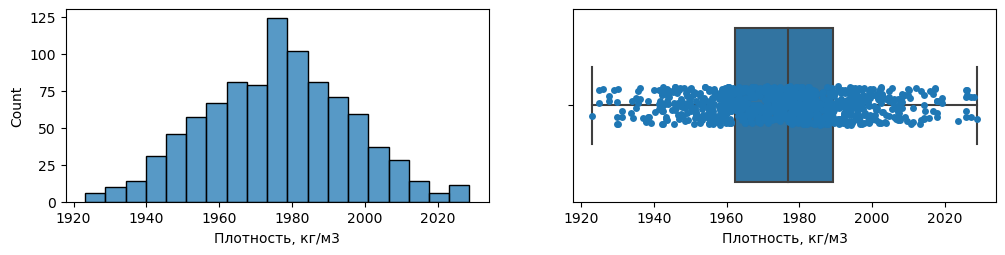

модуль упругости, ГПа: 3s=0 iq=0


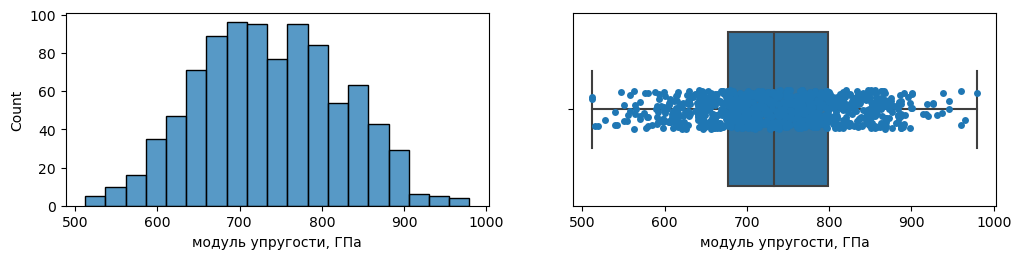

Количество отвердителя, м.%: 3s=0 iq=0


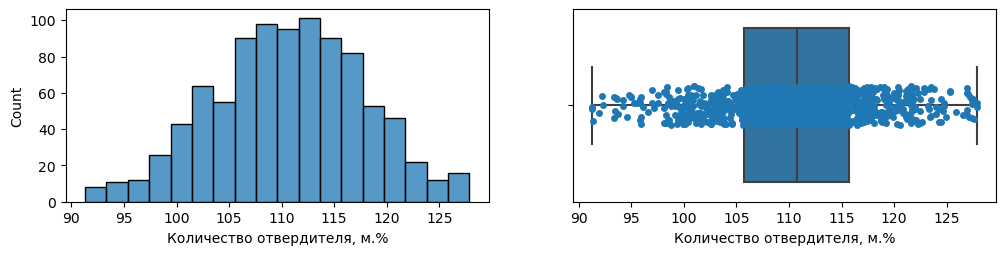

Содержание эпоксидных групп,%_2: 3s=0 iq=0


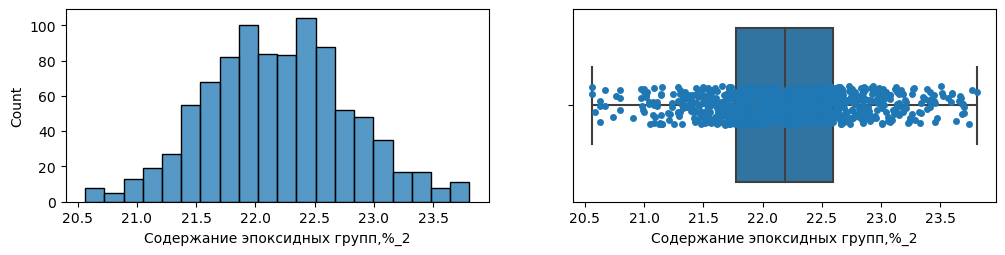

Температура вспышки, С_2: 3s=0 iq=0


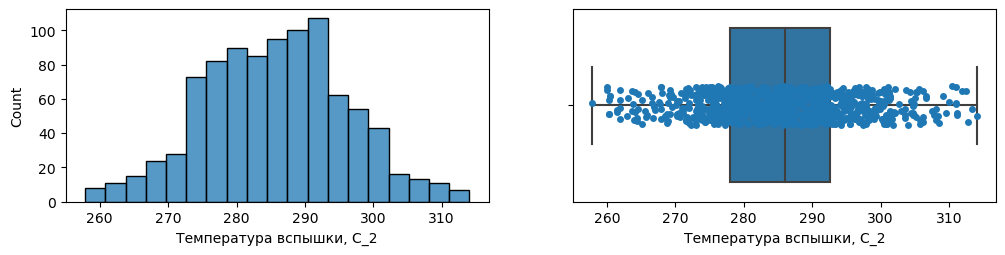

Поверхностная плотность, г/м2: 3s=0 iq=0


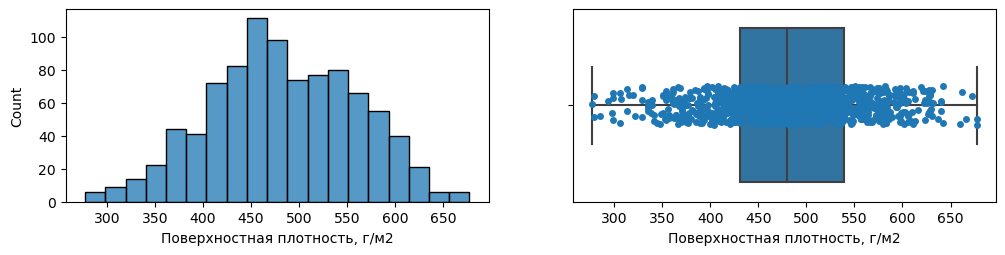

Модуль упругости при растяжении, ГПа: 3s=0 iq=0


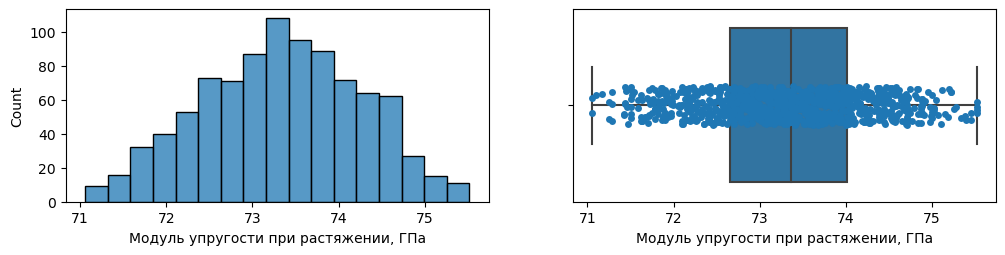

Прочность при растяжении, МПа: 3s=0 iq=0


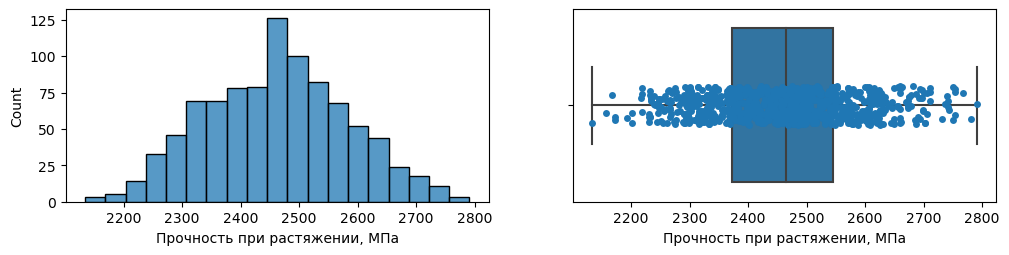

Потребление смолы, г/м2: 3s=0 iq=0


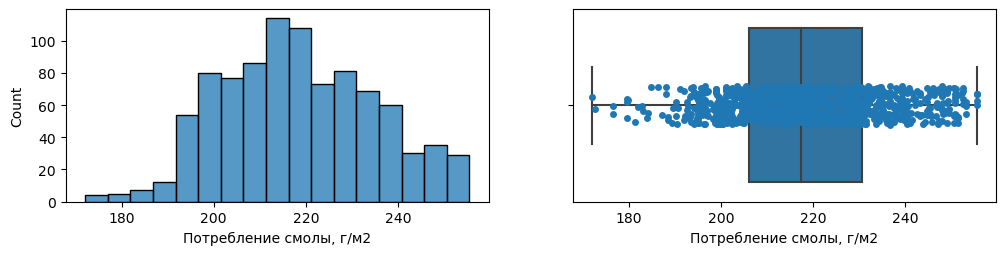

Угол нашивки, град: 3s=0 iq=0


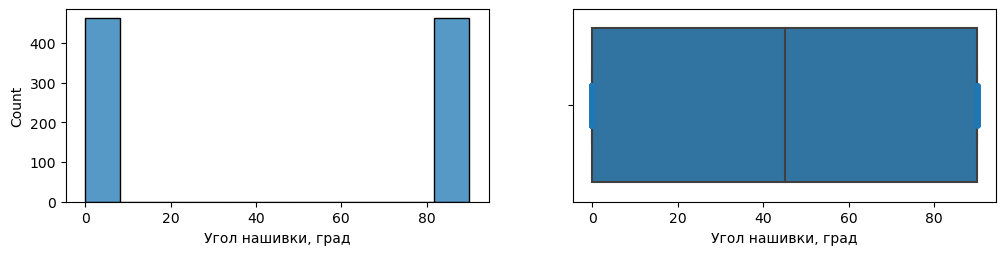

Шаг нашивки: 3s=0 iq=0


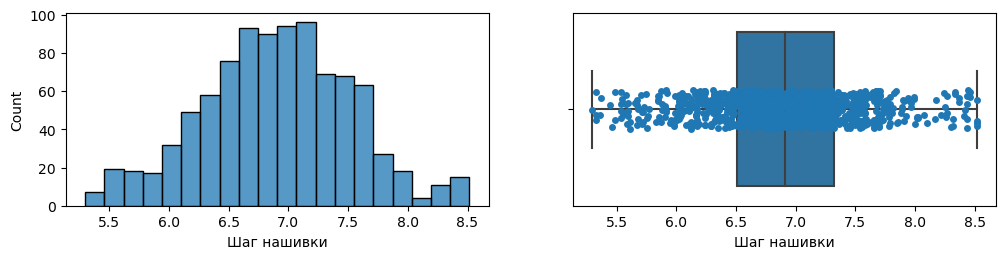

Плотность нашивки: 3s=0 iq=0


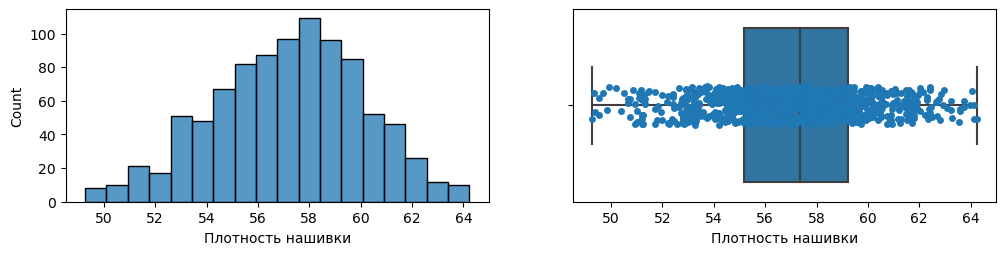

Метод 3-х сигм, выбросов: 0
Метод межквартильных расстояний, выбросов: 0


In [20]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методо 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методо межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:red', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

In [21]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       924.0     2.932116    0.215637   
Плотность, кг/м3                      924.0  1975.902241   19.925660   
модуль упругости, ГПа                 924.0   736.850530   86.591695   
Количество отвердителя, м.%           924.0   110.584393    7.203078   
Содержание эпоксидных групп,%_2       924.0    22.191818    0.604306   
Температура вспышки, С_2              924.0   285.706719   10.460868   
Поверхностная плотность, г/м2         924.0   482.899576   76.064652   
Модуль упругости при растяжении, ГПа  924.0    73.335665    0.925157   
Прочность при растяжении, МПа         924.0  2461.783582  120.645378   
Потребление смолы, г/м2               924.0   218.450230   16.472961   
Угол нашивки, град                    924.0    45.000000   45.024370   
Шаг нашивки                           924.0     6.902088    0.622076   
Плотность нашивки                     924.0    57.178052    2.916735   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          2.379205     2.785861     2.918828   
Плотность, кг/м3                      1923.156956  1962.192092  1976.948090   
модуль упругости, ГПа                  512.300769   676.835467   732.380444   
Количество отвердителя, м.%             91.299142   105.717123   110.790713   
Содержание эпоксидных групп,%_2         20.562701    21.771108    22.185602   
Температура вспышки, С_2               257.862045   278.046670   285.962808   
Поверхностная плотность, г/м2          277.417907   431.079320   479.478965   
Модуль упругости при растяжении, ГПа    71.056908    72.660062    73.362295   
Прочность при растяжении, МПа         2133.994854  2372.444184  2464.566368   
Потребление смолы, г/м2                172.102996   206.029171   217.439611   
Угол нашивки, град                       0.000000     0.000000    45.000000   
Шаг нашивки                              5.297346     6.506000     6.911427   
Плотность нашивки                       49.276182    55.171161    57.365874   

                                              75%          max  
Соотношение матрица-наполнитель          3.079515     3.480728  
Плотность, кг/м3                      1989.363002  2028.708897  
модуль упругости, ГПа                  798.469292   979.266439  
Количество отвердителя, м.%            115.675254   127.859051  
Содержание эпоксидных групп,%_2         22.592230    23.805764  
Температура вспышки, С_2               292.546133   314.051687  
Поверхностная плотность, г/м2          538.722080   677.173335  
Модуль упругости при растяжении, ГПа    74.011771    75.518638  
Прочность при растяжении, МПа         2545.092978  2790.884034  
Потребление смолы, г/м2                230.500895   255.496370  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              7.316783     8.515994  
Плотность нашивки                       59.241142    64.231600

In [ ]:
fig, axes = plt.subplots(13, 2, figsize=(15, 50))
for i, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i, 0])
    sns.boxplot(data=df, x=column, ax=axes[i, 1])    
plt.show()

In [22]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

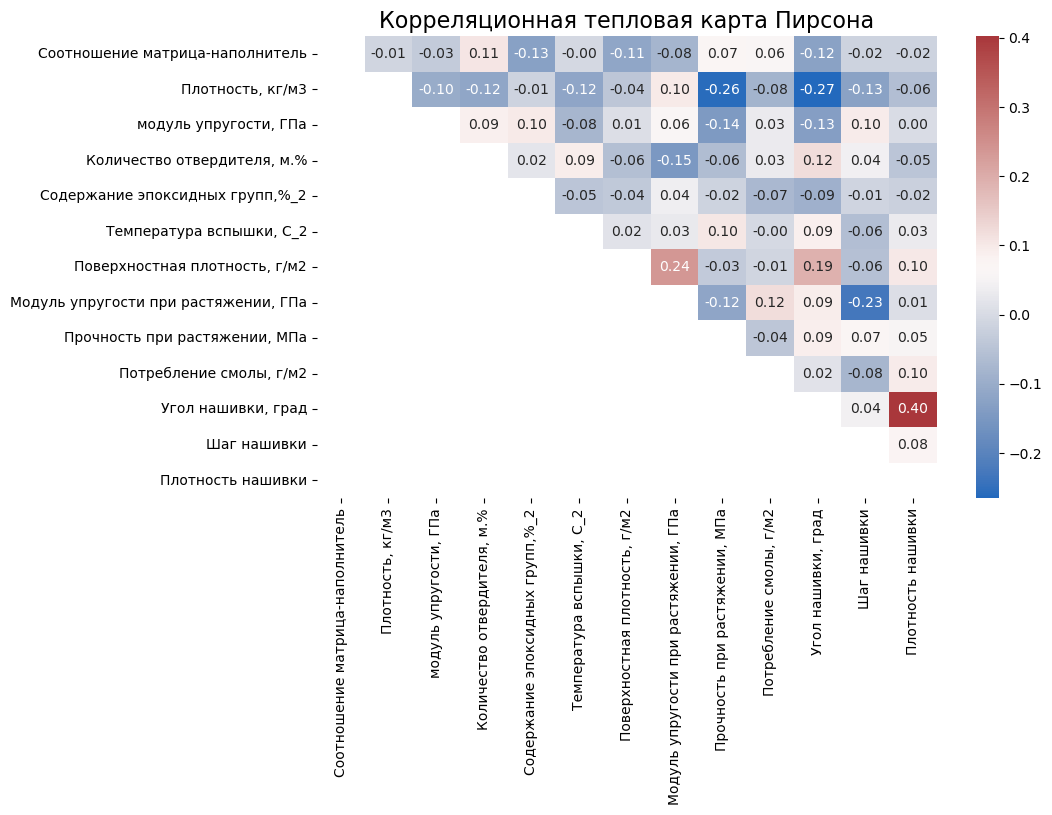

In [23]:
## Корреляционная тепловая карта Пирсона

fig, ax = plt.subplots(figsize=(10, 6))
matrix = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='vlag', ax=ax, mask=matrix)
plt.title("Корреляционная тепловая карта Пирсона", fontsize=16)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 9 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       924 non-null    float64
 1   Плотность, кг/м3                      924 non-null    float64
 2   модуль упругости, ГПа                 924 non-null    float64
 3   Количество отвердителя, м.%           924 non-null    float64
 4   Содержание эпоксидных групп,%_2       924 non-null    float64
 5   Температура вспышки, С_2              924 non-null    float64
 6   Поверхностная плотность, г/м2         924 non-null    float64
 7   Модуль упругости при растяжении, ГПа  924 non-null    float64
 8   Прочность при растяжении, МПа         924 non-null    float64
 9   Потребление смолы, г/м2               924 non-null    float64
 10  Угол нашивки, град                    924 non-null    int64  
 11  Шаг нашивки       

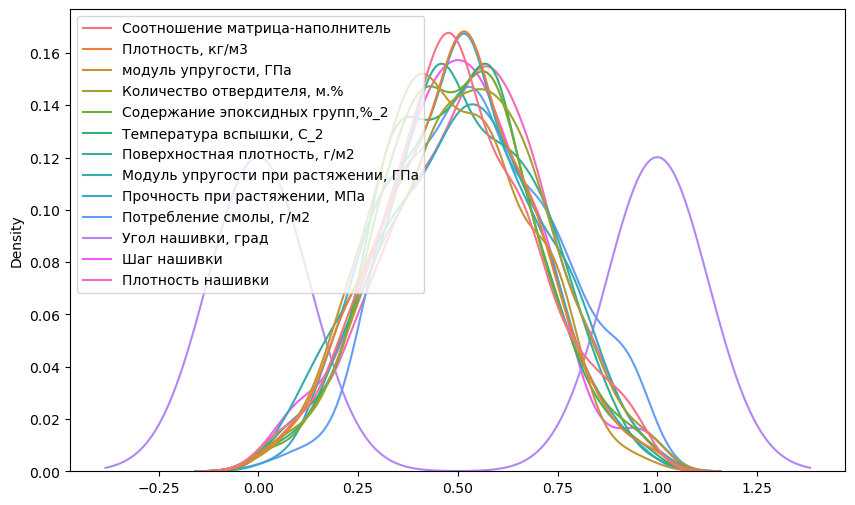

In [25]:
## Масштабирование данных
df = df.replace({'Угол нашивки, град':{0.0:0, 90.0:1}})
df.head()
scaler = MinMaxScaler()
dfsc = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# pt = PowerTransformer()
# dfsc = pd.DataFrame(pt.fit_transform(dfsc), columns=dfsc.columns)
dfsc.describe().T
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=dfsc)
plt.show()

In [209]:
dfsc.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       924.0  0.501952  0.195763  0.0   
Плотность, кг/м3                      924.0  0.499709  0.188776  0.0   
модуль упругости, ГПа                 924.0  0.480870  0.185435  0.0   
Количество отвердителя, м.%           924.0  0.527497  0.197021  0.0   
Содержание эпоксидных групп,%_2       924.0  0.502339  0.186338  0.0   
Температура вспышки, С_2              924.0  0.495548  0.186171  0.0   
Поверхностная плотность, г/м2         924.0  0.514018  0.190278  0.0   
Модуль упругости при растяжении, ГПа  924.0  0.510734  0.207354  0.0   
Прочность при растяжении, МПа         924.0  0.499002  0.183662  0.0   
Потребление смолы, г/м2               924.0  0.555766  0.197533  0.0   
Угол нашивки, град                    924.0  0.500000  0.500271  0.0   
Шаг нашивки                           924.0  0.498576  0.193273  0.0   
Плотность нашивки                     924.0  0.528362  0.195029  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.369176  0.489888  0.635765  1.0  
Плотность, кг/м3                      0.369819  0.509618  0.627237  1.0  
модуль упругости, ГПа                 0.352349  0.471297  0.612826  1.0  
Количество отвердителя, м.%           0.394366  0.533141  0.666744  1.0  
Содержание эпоксидных групп,%_2       0.372613  0.500422  0.625806  1.0  
Температура вспышки, С_2              0.359223  0.500106  0.617268  1.0  
Поверхностная плотность, г/м2         0.384389  0.505462  0.653660  1.0  
Модуль упругости при растяжении, ГПа  0.359312  0.516702  0.662268  1.0  
Прочность при растяжении, МПа         0.362998  0.503238  0.625826  1.0  
Потребление смолы, г/м2               0.406821  0.543648  0.700270  1.0  
Угол нашивки, град                    0.000000  0.500000  1.000000  1.0  
Шаг нашивки                           0.375516  0.501478  0.627418  1.0  
Плотность нашивки                     0.394170  0.540920  0.666311  1.0

In [162]:
## 'Модуль упругости при растяжении, ГПа

X_upr = dfsc.drop('Модуль упругости при растяжении, ГПа', axis=1)
y_upr = dfsc['Модуль упругости при растяжении, ГПа']
X_upr_train, X_upr_test, y_upr_train, y_upr_test = train_test_split(X_upr, y_upr, test_size=0.3, random_state=3000)
y_upr_train = y_upr_train.values
y_upr_test = y_upr_test.values
print(X_upr_train.shape)
print(X_upr_test.shape)
print(y_upr_train.shape)
print(y_upr_test.shape)

pca_num_components = 1

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_upr)
#print(reduced_data)
#reduced_data.info()
results = pd.DataFrame(reduced_data,columns=['pca'])
# dfp=y_upr.join(results, how='inner')
# dfp.head()
#df['PCA']= reduced_data
#dfselect = df[['Модуль упругости при растяжении, ГПа', 'PCA']]

#dfselect.head()
# sns.scatterplot(x="y_upr", y="pca2", data=results)
# plt.title('K-means Clustering with 2 dimensions')
# plt.show()

(646, 12)
(278, 12)
(646,)
(278,)


In [ ]:
df.describe().T

In [150]:
## Задание функций и моделей

def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) 
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) 
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) 
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) 
    return stat

In [ ]:
show_statistics(X_upr_train )

In [ ]:
show_statistics(pd.DataFrame(y_upr_train))
fig, ax = plt.subplots(figsize=(12, 5))

y_upr
y1_train = y_upr_train.values
y1_test = y_upr_test.values
ax.plot(y1_test, label='Данные')

In [151]:
# Сравнение моделей
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, X_upr_train, y_upr_train)
stat1_1.style.highlight_max(axis=0)

In [152]:
## Поиск по сетке
r2_scores = {}
mae_scores = {}
rmse_scores = {}
params = [{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
ridge_reg = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=42)

cv = GridSearchCV(estimator=ridge_reg,param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_upr_train, y_upr_train)
GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.0002, 'solver': 'saga'}
Лучший средний балл перекрестной проверки:
-0.19018339832275968


In [153]:
s_models1 = {}

In [154]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
3  {'alpha': 10, 'solver': 'lsqr'} -0.156696     1

In [155]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params      MAE  rank
0  {'alpha': 0.001} -0.15617     1

In [156]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params      MAE  rank
8  {'C': 0.02, 'kernel': 'poly'} -0.12371     1

In [157]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
0  {'n_neighbors': 3} -0.057968     1

In [158]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, X_upr_train, y_upr_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
174  {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 8, 'random_state': 3000, 'splitter': 'best'}   

          MAE  rank  
174 -0.153464     1

In [36]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, X_upr_train, y_upr_train)
stat1_2.style.highlight_max(axis=0)

In [159]:
show_statistics(pd.DataFrame(y_upr_test))
print(y_upr_test.shape)

(278,)


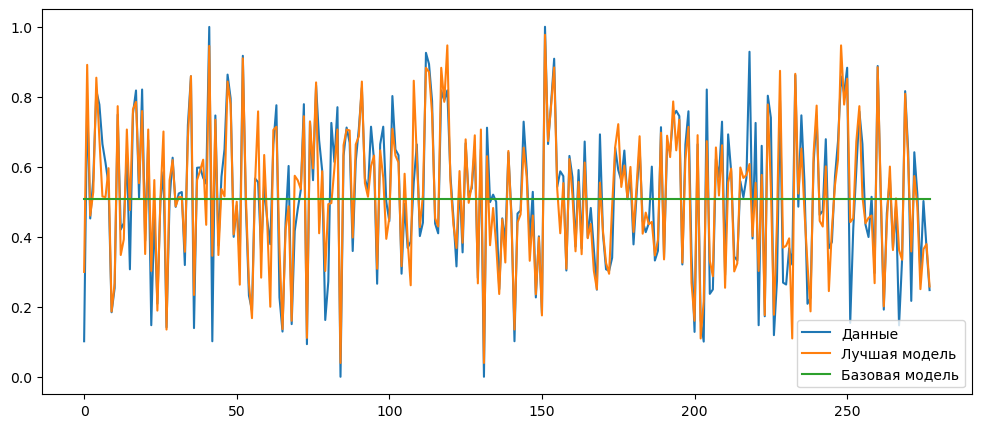

In [163]:
show_statistics(pd.DataFrame(y_upr_test))


base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(X_upr_train, y_upr_train)
y1_pred_base = base_model1.predict(X_upr_test)
best_model1 = KNeighborsRegressor(n_neighbors=3)
best_model1.fit(X_upr_train, y_upr_train)
y1_pred_best = best_model1.predict(X_upr_test)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_upr_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [40]:
## 'Прочность при растяжении, МПа'

X_str = dfsc.drop('Прочность при растяжении, МПа', axis=1)
y_str = dfsc['Прочность при растяжении, МПа']
X_str_train, X_str_test, y_str_train, y_str_test = train_test_split(X_str, y_str, test_size=0.3, random_state=3000)
y_str_train = y_str_train.values
y_str_test = y_str_test.values
print(X_str_train.shape)
print(X_str_test.shape)
print(y_str_train.shape)
print(y_str_test.shape)

(646, 12)
(278, 12)
(646,)
(278,)


In [41]:
## Выбор моделей
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, X_str_train, y_str_train)
stat2_1.style.highlight_max(axis=0)

In [42]:
s_models2 = {}

In [43]:
## Поиск по сетке
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
3  {'alpha': 10, 'solver': 'lsqr'} -0.141922     1

In [44]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
0  {'alpha': 0.1} -0.150025     1
1    {'alpha': 1} -0.150025     1
2    {'alpha': 5} -0.150025     1
3   {'alpha': 10} -0.150025     1
4   {'alpha': 20} -0.150025     1
5   {'alpha': 30} -0.150025     1
6   {'alpha': 40} -0.150025     1
7   {'alpha': 50} -0.150025     1
8   {'alpha': 60} -0.150025     1
9  {'alpha': 100} -0.150025     1

In [45]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params      MAE  rank
14  {'C': 0.3, 'gamma': 'scale', 'kernel': 'rbf'} -0.10009     1

In [46]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
168  {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': 5, 'random_state': 3000, 'splitter': 'best'}   

          MAE  rank  
168 -0.138605     1

In [47]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, X_str_train, y_str_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
32  {'loss': 'squared_error', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150, 'random_state': 3000}   

         MAE  rank  
32 -0.105258     1

In [170]:
stat2_2 = run_models(s_models2, X_str_train, y_str_train)
stat2_2.style.highlight_max(axis=0)

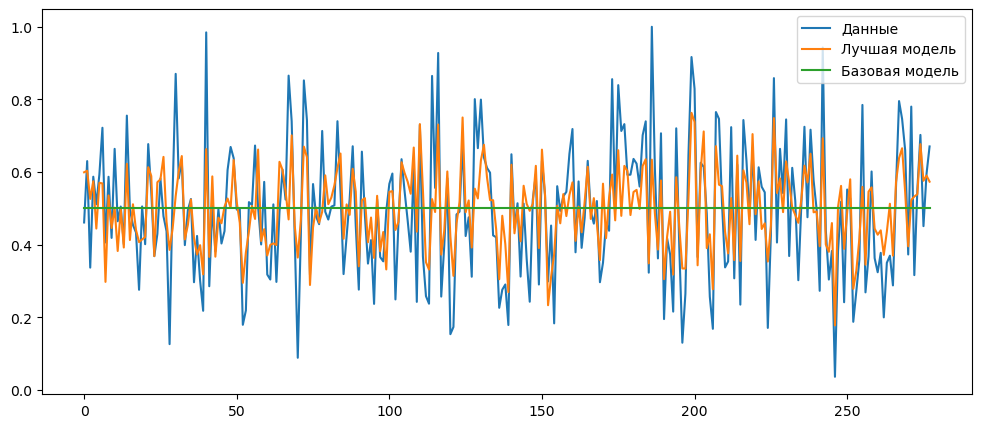

In [172]:
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(X_str_train, y_str_train)
y2_pred_base = base_model2.predict(X_str_test)
best_model2 = SVR(C=0.3)
best_model2.fit(X_str_train, y_str_train)
y2_pred_best = best_model2.predict(X_str_test)
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_str_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [173]:
compare2 = get_metrics('Базовая модель', y_str_test, y2_pred_base)
compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y_str_test, y2_pred_best))
compare2

C:\Users\dnikiforov\AppData\Local\Temp\ipykernel_26224\3189812068.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare2 = compare2.append(get_metrics('Лучшая модель (градиентный бустинг)', y_str_test, y2_pred_best))


R2      RMSE       MAE      MAPE  \
Базовая модель                      -0.000902  0.181048  0.145013  0.432651   
Лучшая модель (градиентный бустинг)  0.588939  0.116025  0.091157  0.246533   

                                     max_error  
Базовая модель                        0.499363  
Лучшая модель (градиентный бустинг)   0.395783

In [ ]:
dma = dfsc.copy()
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(dma)
print(reduced_data)

C:\Users\dnikiforov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


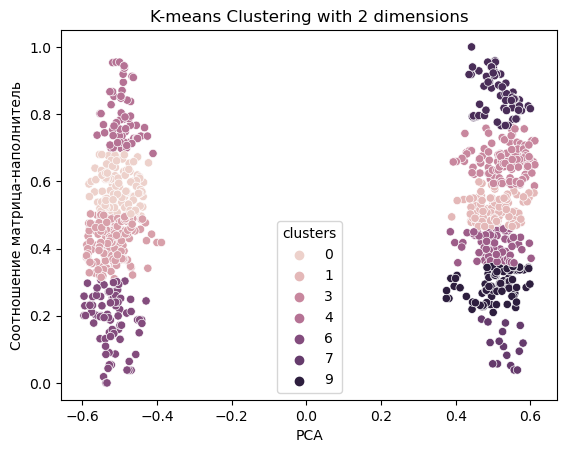

In [52]:
## Кластеризация
dma = dfsc.copy()

pca_num_components = 1

reduced_data = PCA(n_components=pca_num_components).fit_transform(dma)

#print(reduced_data)
# reduced_data.info()
results = pd.DataFrame(reduced_data,columns=['pca'])
# sns.histplot(data=results, x='pca', kde=True)
# dfp=y_upr.join(results, how='inner')
# dfp.head()
dma['PCA']= reduced_data
dfselecta = dma.loc[:,['Соотношение матрица-наполнитель', 'PCA']]

clustering_kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto")
# clustering_SC = SpectralClustering(n_clusters=2, n_neighbors=5, assign_labels='cluster_qr', random_state=0)
        
# nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(data)
# data.info()
# clustering_DBSCAN = DBSCAN(eps=0.01,  algorithm='auto', min_samples=2)
# distances, indices = nbrs.kneighbors(data)
# #print(distances, "\n \n", indices)
dfselecta['clusters'] = clustering_kmeans.fit_predict(dfselecta)
# data.head()
# data.describe()
# pca_num_components = 2

# reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
# results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="PCA", y="Соотношение матрица-наполнитель", hue=dfselecta['clusters'], data=dfselecta)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


# dfselect.head()
# sns.scatterplot(x="PCA", y="Соотношение матрица-наполнитель", data=dfselect)
# plt.title('PCA')
# plt.show()

In [67]:
## Модель MLPRegressor

model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=500,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [53]:
## 'Соотношение матрица-наполнитель'

# dmmc = dm.groupby('clusters').mean()
# std_by_cluster = dm.groupby('clusters').std()
# dmmc.head()
# dmmc.describe()
X_matrix_filler = dfsc.drop('Соотношение матрица-наполнитель', axis=1)
y_matrix_filler = dfsc['Соотношение матрица-наполнитель']
X_matrix_filler.info()
y_matrix_filler.info()
X_matrix_train, X_matrix_test, y_matrix_train, y_matrix_test = train_test_split(X_matrix_filler, y_matrix_filler, test_size=0.3, random_state=3000)
y_matrix_train = y_matrix_train.values
y_matrix_test = y_matrix_test.values
print(X_matrix_train.shape)
print(X_matrix_test.shape)
print(y_matrix_train.shape)
print(y_matrix_test.shape)
#print(mean_by_cluster)
#print(std_by_cluster)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      924 non-null    float64
 1   модуль упругости, ГПа                 924 non-null    float64
 2   Количество отвердителя, м.%           924 non-null    float64
 3   Содержание эпоксидных групп,%_2       924 non-null    float64
 4   Температура вспышки, С_2              924 non-null    float64
 5   Поверхностная плотность, г/м2         924 non-null    float64
 6   Модуль упругости при растяжении, ГПа  924 non-null    float64
 7   Прочность при растяжении, МПа         924 non-null    float64
 8   Потребление смолы, г/м2               924 non-null    float64
 9   Угол нашивки, град                    924 non-null    float64
 10  Шаг нашивки                           924 non-null    float64
 11  Плотность нашивки  

Iteration 1, loss = 0.09810993
Validation score: -2.987331
Iteration 2, loss = 0.06419031
Validation score: -1.456700
Iteration 3, loss = 0.03805211
Validation score: -0.477564
Iteration 4, loss = 0.02389627
Validation score: -0.071271
Iteration 5, loss = 0.01901424
Validation score: -0.026429
Iteration 6, loss = 0.02009441
Validation score: -0.101808
Iteration 7, loss = 0.02203861
Validation score: -0.119427
Iteration 8, loss = 0.02211251
Validation score: -0.067255
Iteration 9, loss = 0.02057083
Validation score: -0.009258
Iteration 10, loss = 0.01905460
Validation score: 0.008825
Iteration 11, loss = 0.01821421
Validation score: -0.008353
Iteration 12, loss = 0.01825189
Validation score: -0.035453
Iteration 13, loss = 0.01852290
Validation score: -0.040781
Iteration 14, loss = 0.01848217
Validation score: -0.014210
Iteration 15, loss = 0.01803829
Validation score: 0.023780
Iteration 16, loss = 0.01758540
Validation score: 0.049193
Iteration 17, loss = 0.01757675
Validation score: 0.

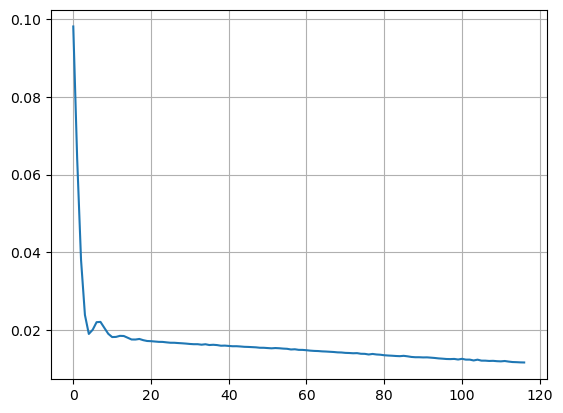

In [68]:
model3_1.fit(X_matrix_train, y_matrix_train)
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

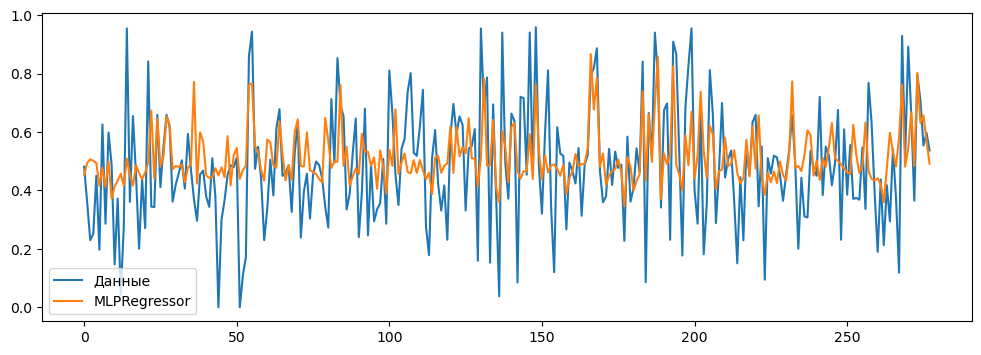

In [69]:
y3_pred_skl = model3_1.predict(X_matrix_test)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y3_pred_skl, label='MLPRegressor')
ax.legend()
plt.show()

In [277]:
base_model3 = DummyRegressor(strategy='mean')
base_model3.fit(X_matrix_train, y_matrix_train)
y3_pred_base = base_model3.predict(X_matrix_test)

compare3_1 = get_metrics('DummyRegressor', y_matrix_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y_matrix_test, y3_pred_skl))
compare3_1

C:\Users\dnikiforov\AppData\Local\Temp\ipykernel_26224\1735434023.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y_matrix_test, y3_pred_skl))


R2      RMSE       MAE          MAPE  max_error
DummyRegressor -0.014993  0.200563  0.157719  1.650086e+13   0.509286
MLPRegressor    0.218544  0.175983  0.135013  1.442920e+13   0.462553

In [128]:
## Нейросеть переобученная

from keras import regularizers
from tensorflow.python.keras.callbacks import TensorBoard

import random
random.seed(1001)
tf.random.set_seed(1001)



def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu',kernel_regularizer=regularizers.l2(0.001), name='dense_1'), 
      
    keras.layers.Dense(units=24, activation='relu',kernel_regularizer=regularizers.l2(0.001), name='dense_2'),
      
        keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      #keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model
model3_2 = construct_model()
model3_2 = compile_model(model3_2)
model3_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 out (Dense)                 (None, 1)                 25        
                                                                 
Total params: 2137 (8.35 KB)
Trainable params: 2137 (8.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [129]:
%%time
#Обучение нейросети
history = model3_2.fit(
  X_matrix_train, 
  y_matrix_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
    shuffle=False,
    use_multiprocessing=False
)

Epoch 1/50
15/15 [==============================] - 1s 13ms/step - loss: 70.1346 - root_mean_squared_error: 0.4196 - val_loss: 47.9289 - val_root_mean_squared_error: 0.2958
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 54.1981 - root_mean_squared_error: 0.2553 - val_loss: 42.1210 - val_root_mean_squared_error: 0.2187
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 53.0625 - root_mean_squared_error: 0.2381 - val_loss: 42.6766 - val_root_mean_squared_error: 0.2458
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 49.7495 - root_mean_squared_error: 0.2592 - val_loss: 42.9050 - val_root_mean_squared_error: 0.2409
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 48.0378 - root_mean_squared_error: 0.2503 - val_loss: 43.5961 - val_root_mean_squared_error: 0.2488
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 46.1788 - root_mean_squared_error: 0.2517 - val_loss: 43.2849 - val

15/15 [==============================] - 0s 4ms/step - loss: 29.8638 - root_mean_squared_error: 0.1983 - val_loss: 34.9039 - val_root_mean_squared_error: 0.2156
Epoch 49/50
15/15 [==============================] - 0s 4ms/step - loss: 30.1447 - root_mean_squared_error: 0.2009 - val_loss: 33.9465 - val_root_mean_squared_error: 0.2234
Epoch 50/50
15/15 [==============================] - 0s 4ms/step - loss: 29.2614 - root_mean_squared_error: 0.1954 - val_loss: 33.0107 - val_root_mean_squared_error: 0.2086
CPU times: total: 5.27 s
Wall time: 4 s


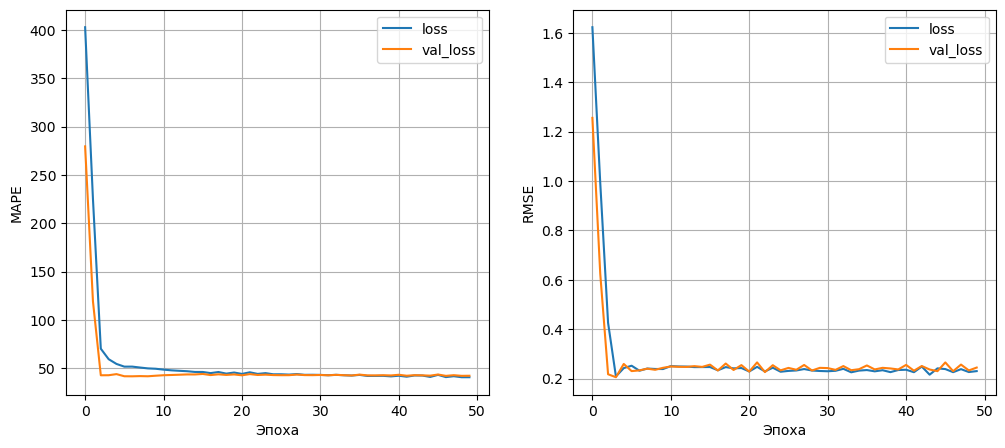

In [123]:
plot_loss(history.history)

In [ ]:
y3_pred_keras2 = model3_2.predict(X_matrix_test)

9/9 [==============================] - 0s 1ms/step


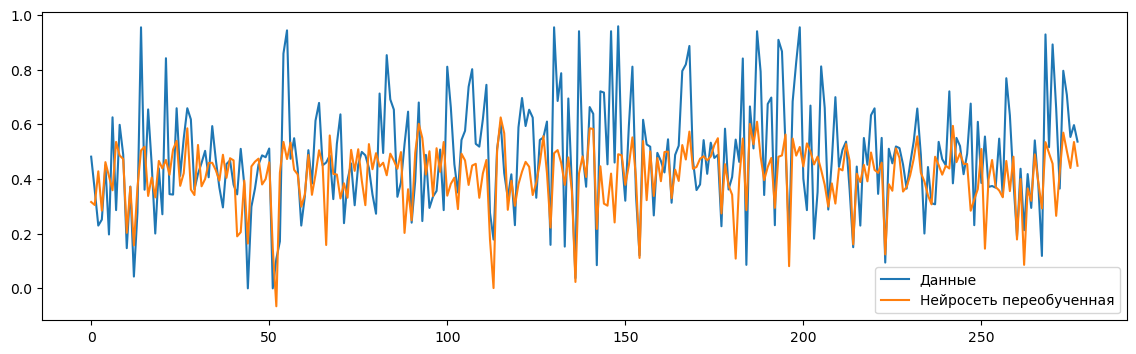

R2      RMSE      MAE          MAPE  max_error
Нейросеть переобученная  0.118761  0.186881  0.14111  5.037199e+12   0.520695

In [130]:
y3_pred_keras2 = model3_2.predict(X_matrix_test)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')

ax.legend()
plt.show()
get_metrics('Нейросеть переобученная', y_matrix_test, y3_pred_keras2)

In [179]:
## Нейросеть с ранней остановкой

model3_3 = construct_model()
model3_3 = compile_model(model3_3)

#Обучение нейросети
history = model3_3.fit(
  X_matrix_train, 
  y_matrix_train,  
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
        shuffle=False,
    use_multiprocessing=False
)

Epoch 1/50
15/15 [==============================] - 2s 15ms/step - loss: 72.9433 - root_mean_squared_error: 0.4367 - val_loss: 56.3868 - val_root_mean_squared_error: 0.3505
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 51.9193 - root_mean_squared_error: 0.2944 - val_loss: 43.1197 - val_root_mean_squared_error: 0.2364
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 51.8905 - root_mean_squared_error: 0.2345 - val_loss: 42.8225 - val_root_mean_squared_error: 0.2388
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 50.3227 - root_mean_squared_error: 0.2481 - val_loss: 43.0126 - val_root_mean_squared_error: 0.2525
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 49.0643 - root_mean_squared_error: 0.2508 - val_loss: 42.4706 - val_root_mean_squared_error: 0.2493
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 48.3398 - root_mean_squared_error: 0.2472 - val_loss: 42.2850 - val

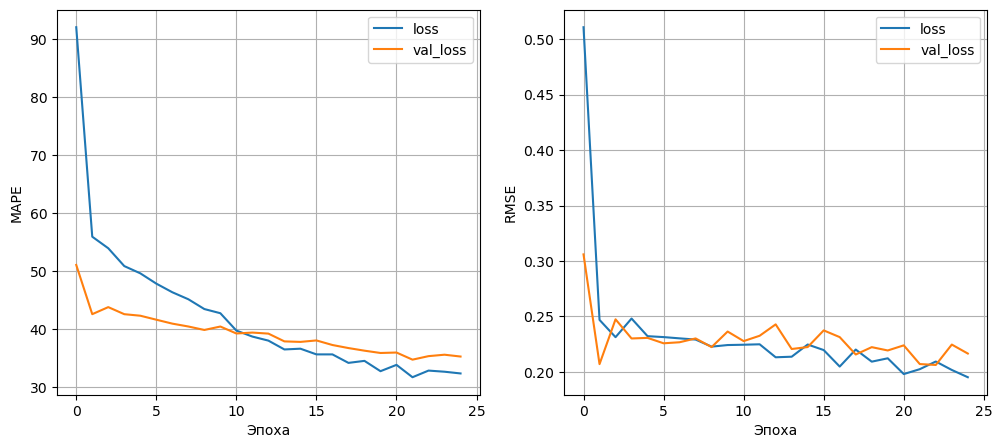

In [132]:
plot_loss(history.history)

In [ ]:
y3_pred_keras3 = model3_3.predict(X_matrix_test)

In [ ]:
model3_3.evaluate(X_matrix_test, y_matrix_test)

9/9 [==============================] - 0s 1ms/step - loss: 1249199.5000 - root_mean_squared_error: 0.1771


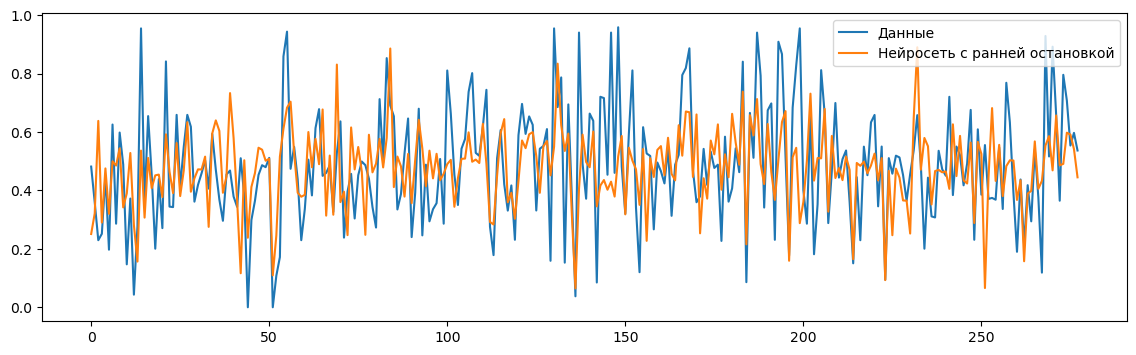

R2      RMSE       MAE          MAPE  \
Нейросеть с ранней остановкой  0.208985  0.177056  0.135422  5.625733e+12   

                               max_error  
Нейросеть с ранней остановкой   0.666826

In [180]:
y3_pred_keras3 = model3_3.predict(X_matrix_test)
model3_3.evaluate(X_matrix_test, y_matrix_test)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')

ax.legend()
plt.show()
get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3)

In [109]:
#compare3_2 = get_metrics('DummyRegressor', y_matrix_test, y3_pred_base)
get_metrics('Нейросеть переобученная', y_matrix_test, y3_pred_keras2)
#get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3)
#compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y_matrix_test, y3_pred_keras2))
#compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3))

R2      RMSE      MAE          MAPE  max_error
Нейросеть переобученная  0.118761  0.186881  0.14111  5.037199e+12   0.520695

9/9 [==============================] - 0s 566us/step


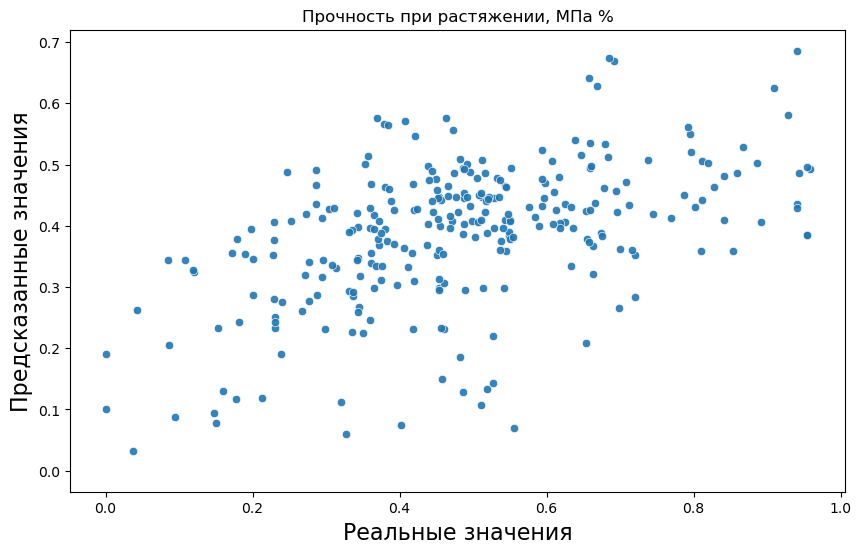

In [136]:
test_predictions = model3_3.predict(X_matrix_test).flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_matrix_test, y=test_predictions, alpha=0.9)
line_X = np.linspace(0, 1, 1)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Прочность при растяжении, МПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

In [112]:
get_metrics('Нейросеть с ранней остановкой', y_matrix_test, y3_pred_keras3)

R2      RMSE       MAE          MAPE  \
Нейросеть с ранней остановкой  0.011136  0.197965  0.150386  4.723224e+12   

                               max_error  
Нейросеть с ранней остановкой   0.570389

In [137]:
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(12,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
       keras.layers.Dense(units=24, activation='relu', name='dense_3'),
       keras.layers.Dropout(0.05, name='dropout_3'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_4'),
#       keras.layers.Dropout(0.05, name='dropout_4'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_5'),
#       keras.layers.Dropout(0.05, name='dropout_5'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_6'),
#       keras.layers.Dropout(0.05, name='dropout_6'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_7'),
#       keras.layers.Dropout(0.05, name='dropout_7'),
#       keras.layers.Dense(units=24, activation='relu', name='dense_8'),
#       keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])
model3_4 = compile_model(model3_4)
model3_4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 out (Dense)                 (None, 1)               

In [138]:
## Нейросеть dropout

history = model3_4.fit(
  X_matrix_train, 
  y_matrix_train,  
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  
        shuffle=False,
    use_multiprocessing=False
)

Epoch 1/50
15/15 [==============================] - 1s 13ms/step - loss: 73.0119 - root_mean_squared_error: 0.4188 - val_loss: 46.4298 - val_root_mean_squared_error: 0.2501
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 62.2062 - root_mean_squared_error: 0.2515 - val_loss: 45.2093 - val_root_mean_squared_error: 0.2378
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 55.1765 - root_mean_squared_error: 0.2677 - val_loss: 46.8827 - val_root_mean_squared_error: 0.2698
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 56.0464 - root_mean_squared_error: 0.2664 - val_loss: 45.0041 - val_root_mean_squared_error: 0.2581
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 54.8970 - root_mean_squared_error: 0.2665 - val_loss: 43.1654 - val_root_mean_squared_error: 0.2535
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 54.3208 - root_mean_squared_error: 0.2693 - val_loss: 42.9842 - val

15/15 [==============================] - 0s 3ms/step - loss: 37.6078 - root_mean_squared_error: 0.2364 - val_loss: 37.5683 - val_root_mean_squared_error: 0.2491
Epoch 49/50
15/15 [==============================] - 0s 4ms/step - loss: 39.0978 - root_mean_squared_error: 0.2222 - val_loss: 37.6829 - val_root_mean_squared_error: 0.2538
Epoch 50/50
15/15 [==============================] - 0s 4ms/step - loss: 37.4851 - root_mean_squared_error: 0.2290 - val_loss: 38.9725 - val_root_mean_squared_error: 0.2589


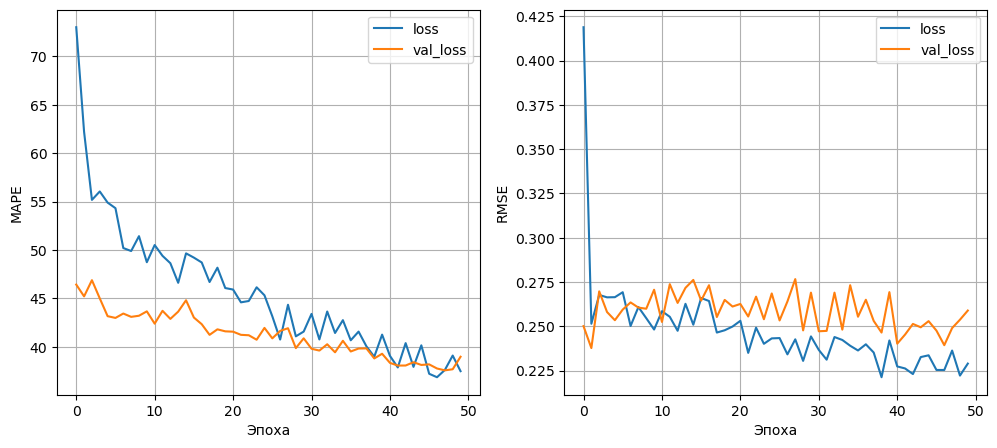

In [139]:
plot_loss(history.history)

9/9 [==============================] - 0s 629us/step - loss: 739232.3750 - root_mean_squared_error: 0.2313


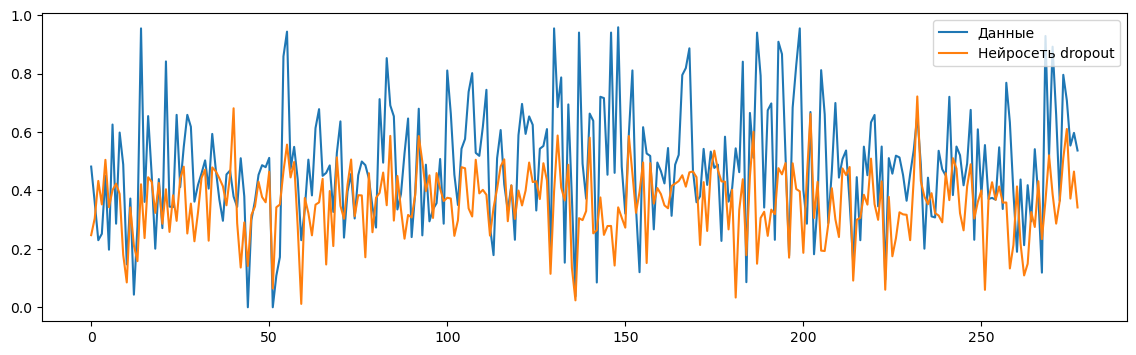

R2      RMSE       MAE          MAPE  max_error
Нейросеть dropout -0.349995  0.231305  0.173923  3.329039e+12   0.791174

In [140]:
y4_pred_keras4 = model3_4.predict(X_matrix_test)
model3_4.evaluate(X_matrix_test, y_matrix_test)
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_matrix_test, label='Данные')
ax.plot(y4_pred_keras4, label='Нейросеть dropout')

ax.legend()
plt.show()
get_metrics('Нейросеть dropout', y_matrix_test, y4_pred_keras4)

In [182]:
## тренировочный и тестовый набор

best_model1
print(X_upr_train.shape)
print(X_upr_test.shape)
print(y_upr_train.shape)
print(y_upr_test.shape)
# #X_upr_train, X_upr_test, y_upr_train, y_upr_test = train_test_split(X_upr, y_upr, test_size=0.3, random_state=3000)
result1 = pd.DataFrame()
y1_pred_train = best_model1.predict(X_upr_train)
print(y1_pred_train.shape)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тренировочный', y_upr_train, y1_pred_train)])
y1_pred_test = best_model1.predict(X_upr_test)
result1 = pd.concat([result1, get_metrics('Модуль упругости, тестовый', y_upr_test, y1_pred_test)])


y2_pred_train = best_model2.predict(X_str_train)

result1 = pd.concat([result1, get_metrics('Прочность при растяжении, тренировочный', y_str_train, y2_pred_train)])

y2_pred_test = best_model2.predict(X_str_test)

result1 = pd.concat([result1, get_metrics('Прочность при растяжении, тестовый', y_str_test, y2_pred_test)])


result1

y3_pred_train = model3_3.predict(X_matrix_train)
result1 = pd.concat([result1, get_metrics('Соотношение матрица-наполнитель, тренировочный', y_matrix_train, y3_pred_train)])
y3_pred_test = model3_3.predict(X_matrix_test)
result1 = pd.concat([result1, get_metrics('Соотношение матрица-наполнитель, тестовый', y_matrix_test, y3_pred_test)])

result1


(646, 12)
(278, 12)
(646,)
(278,)
(646,)
9/9 [==============================] - 0s 0s/step


R2      RMSE       MAE  \
Модуль упругости, тренировочный                 0.963301  0.039467  0.022721   
Модуль упругости, тестовый                      0.853040  0.080487  0.054977   
Прочность при растяжении, тренировочный         0.685419  0.103562  0.084067   
Прочность при растяжении, тестовый              0.588939  0.116025  0.091157   
Соотношение матрица-наполнитель, тренировочный  0.209754  0.172197  0.126207   
Соотношение матрица-наполнитель, тестовый       0.208985  0.177056  0.135422   

                                                        MAPE  max_error  
Модуль упругости, тренировочный                 6.819143e-02   0.297971  
Модуль упругости, тестовый                      1.280103e+12   0.320850  
Прочность при растяжении, тренировочный         1.251893e+12   0.386806  
Прочность при растяжении, тестовый              2.465326e-01   0.395783  
Соотношение матрица-наполнитель, тренировочный  2.950356e-01   0.615073  
Соотношение матрица-наполнитель, тестовый       5.625733e+12   0.666826

In [175]:
best_model2

SVR(C=0.3)

In [267]:
## Сохранение модели и проверка работоспособности загруженной версии
import pickle
model = KNeighborsRegressor(n_neighbors=3).fit(X_uprn_train, y_uprn_train)
pickle.dump(model, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
#X_uprn_test.head().T
val = X_uprn_test.head(1).values.tolist()
print(val)

pickled_model.predict(val)


[[2.909760729608066, 1971.0979494860405, 701.6631206560565, 105.60923058163786, 22.059723953514393, 285.2339273251449, 480.75726038836507, 2437.0199990716437, 214.74787711509032, 90.0, 6.81938553412735, 58.38297644603422]]
